
### PDH Fundamentals  

        Sean Keenan, PhD Physics  
        Quantum Memories Group, Heriot-Watt University, Edinburgh  
        2024  

In [1]:
import sys
# Add the parent directory to the system path
sys.path.insert(1, r"C:\Users\keena\Documents\University\python_scripts")

from functions import FP_characteristics
import numpy as np

fp = FP_characteristics()

fp.save = True
fp.dir = "C:/Users/keena/Documents/vscode/Thesis_SMK/Figures/"
fp.folder = "Chapter-3/"
fp.format = 'svg'


#### Cavity Basics

- Set freqeuncy range
- Define cavity parameters
- Plot transmission and reflection spectra


29.82
figure saved!
figure saved!


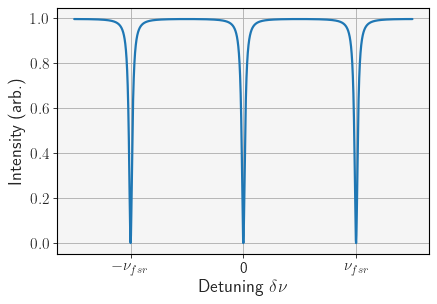

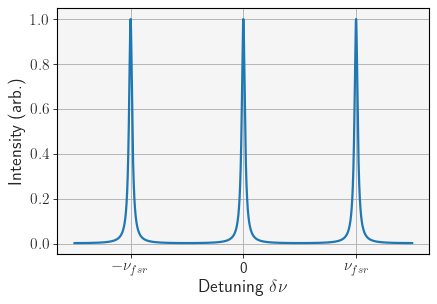

In [3]:
# simple planar cavity with r_1 = r_2
fp.r_1 = 0.9
fp.r_2 = 0.9
fp.length = 1
print(round(fp.finesse, 2))

fp.scale = 1/fp.fsr                                     # set scale to give x in fsr
freqs = np.arange(-1.5*fp.fsr, 1.5*fp.fsr, fp.fsr/1e4)  # lets just plot over a few fsr
fig_r, ax_r = fp.plot_reflected(freqs, lims=[])         # plot the reflection
ax_r.set_xticks([-1, 0, 1])
ax_r.set_xticklabels(['$-\\nu_{fsr}$', '0', '$\\nu_{fsr}$'])

fp.fname = f'reflection_{round(fp.finesse, 2)}'
fp.save_fig(figure=fig_r)

fig_t, ax_t = fp.plot_transmitted(freqs, lims=[])       # plot the transmission
ax_t.set_xticks([-1, 0, 1])
ax_t.set_xticklabels(['$-\\nu_{fsr}$', '0', '$\\nu_{fsr}$'])

fp.fname = f'transmitted_{round(fp.finesse, 2)}'
fp.save_fig(figure=fig_t)


#### PDH Basics

- Plot reflection co-efficient
- plot error signal for a given detuning 


155.5
figure saved!
figure saved!


[Text(-25.0, 0, '$-\\Omega$'), Text(0.0, 0, '0'), Text(25.0, 0, '$\\Omega$')]

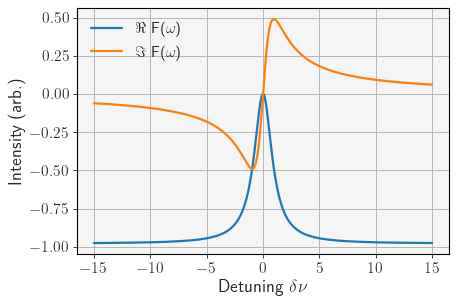

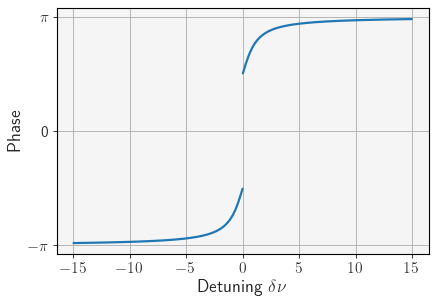

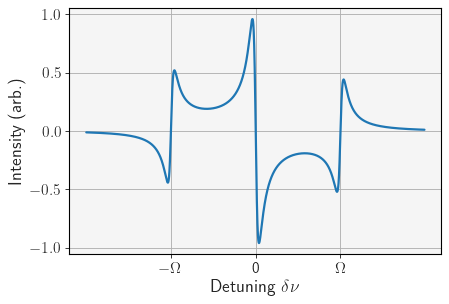

In [23]:
# increase finesse for sharper error signal
fp.r_1 = 0.98
fp.r_2 = 0.98
print(round(fp.finesse, 2))

fp.scale = 1E-6         # x axis in MHz
fig_i, fig_p  = fp.plot_ref_coeff(freqs, lims=[-fp.fsr//10, fp.fsr//10])

fp.fname = f'rc_int_{round(fp.finesse, 2)}'
fp.save_fig(figure=fig_i[0])
fp.fname = f'rc_phase_{round(fp.finesse, 2)}'
fp.save_fig(figure=fig_p[0])

omega = 25E6            # set detuning of modulation
fig_err, ax_err = fp.plot_error_sig(freqs, detune=omega, lims=[-omega*2, omega*2])
ax_err.set_xticks([-omega*fp.scale, 0, omega*fp.scale])
ax_err.set_xticklabels(['$-\\Omega$', '0', '$\\Omega$'])

In [5]:
import matplotlib.pyplot as mp

In [10]:
fp.r_1 = 0.9
fp.r_2 = 0.9
print(round(fp.finesse, 2))

29.82


61.25


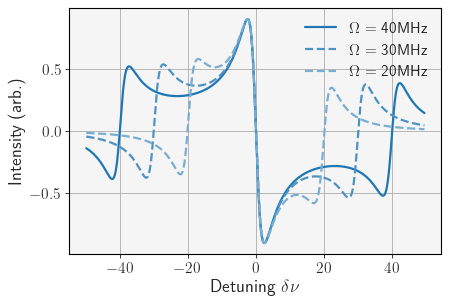

In [39]:
omega = 40E6            # set detuning of modulation
lims=[-omega*2, omega*2]

fp.r_1 = 0.95
fp.r_2 = 0.95
print(round(fp.finesse, 2))

a, b = fp.clip(freqs, lims)
freqs = freqs[a:b]
error = fp.err_signal(freqs, detune=omega)

fig, ax = mp.subplots()
ax.plot(freqs*fp.scale, error.imag, color='C0',  label='$\\Omega$ = 40MHz')
ax.set(xlabel='Detuning $\\delta\\nu$', ylabel='Intensity (arb.)')
#ax.set_xticks([-omega*fp.scale, 0, omega*fp.scale])
#ax.set_xticklabels(['$-\\Omega$', '0', '$\\Omega$'])

omega = 30E6 
error = fp.err_signal(freqs, detune=omega)
ax.plot(freqs*fp.scale, error.imag, '--', color=light1, label='$\\Omega$ = 30MHz')

omega = 20E6 
error = fp.err_signal(freqs, detune=omega)
ax.plot(freqs*fp.scale, error.imag, '--', color=light2 ,label='$\\Omega$ = 20MHz')

ax.legend(loc='upper right')
path = f'{fp.dir}{fp.folder}detune_err.{fp.format}'
fig.savefig(fname=path, dpi=fp.res, format=fp.format, bbox_inches='tight')

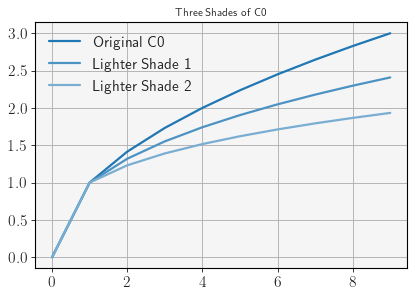

In [32]:
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb

# Get the default 'C0' color
base_color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]  # 'C0'

# Create lighter shades of 'C0' by scaling the RGB values
def lighten_color(color, factor):
    """Lightens a color by blending it with white.
    
    Args:
        color: The base color (RGB or named color).
        factor: The amount to lighten (0 = original, 1 = white).
    
    Returns:
        A lighter color as an RGB tuple.
    """
    base_rgb = to_rgb(color)
    return [(1 - factor) * c + factor * 1 for c in base_rgb]  # Blend with white

# Original, slightly lighter, and even lighter shades
original = base_color
light1 = lighten_color(base_color, 0.2)  # 40% lighter
light2 = lighten_color(base_color, 0.4)  # 70% lighter

# Visualize the colors
x = range(10)
y1 = [xi**0.5 for xi in x]
y2 = [xi**0.4 for xi in x]
y3 = [xi**0.3 for xi in x]

fig, ax = plt.subplots()
ax.plot(x, y1, color=original, label='Original C0')
ax.plot(x, y2, color=light1, label='Lighter Shade 1')
ax.plot(x, y3, color=light2, label='Lighter Shade 2')

ax.legend()
ax.set_title('Three Shades of C0')
plt.show()
